<a href="https://colab.research.google.com/github/Workinehk/new-repository/blob/main/DSCI_632_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DSCI 632 Final

Your final is to use the dataset of your choice and the techniques in this class to do the following:

1. Define and describe the dataset (10 points)
1. Clean the data (10 points)
1. Transform the clean data (10 points)
1. Show your analysis of the data (10 points)

## Ground Rules

1. Explain everything you're doing with pyspark in the code cells using [markdown](https://www.markdownguide.org/cheat-sheet) in text cells. Help the reader understand why you're doing each step so they can re-create it. Remember, this is an assignment to show how you analyze data to a potential employer. Don't use code comments to explain things.
1. All of the sections are heading 1 in markdown, so use heading 2 to write your explainations, and heading 3 for any sub-headers. Check in your table of contents view in colab to make sure each point is listed before you turn this in.
1. Don't hesisate to use multiple code/text cells in each section, as long as they're all labeled and described.
1. Assume that the reader doesn't have access to the dataset on your local machine. Provide a link to the dataset you're using, or if able, include code to copy it from a public source. Don't rely on uploading from your local machine. (Importing from Google Drive is ok, as long as you provide the link to the data)
1. If using GCP services, include screenshots from your console if there's a step that you aren't able to re-produce in code. Using the SDK is always preferred, but you won't lose points for using screenshots and explaining them.
1. Import the data ONCE, then transform it to fit your analysis.
1. Don't overwrite data, make new columns for new transformations. You can always drop columns later, but you can't get overwritten values back.
1. Feel free to work with classmates, but all work submitted must be your own.
1. Make sure to run disconnect the runtime and re-run the notebook at least once before turning in. If you are getting certain Java runtime errors, this might also help.

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

---

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?

I choose this dataset to gain experience in predictive modeling outside of my other course dataset(healthdataset), as well as to learn about forecasting. Additionally, the dataset appears to be a good fit for my project because it primarily consists of numerical data, which makes better and a bit easier to manipulate for various analyses and modeling tasks.

1. What variables will you use?
Iam planning to start with basic exploratory data analysis (EDA) focusing on variables such as temperature, radiation, time of sunrise, time of sunset, pressure, etc. Depending on the insights gained from the initial EDA, I may explore and manipulate additional variables.

1. What analysis(es) will you run?
After cleaning and pre processing the data my initial analysis will involve basic exploratory data analysis, summary statistics, and visualization to understand the relationships between different variables. This will help me gain insights into the dataset and potentially identify patterns or correlations.

1. Do you have any hypotheses? What are they?
My first hypothesis is about the relationship between solar energy irradiation and temperature. I suspect that there might be a correlation between these two variables, as temperature could influence the amount of solar radiation received. Additionally, I am interested in exploring whether other variables have a direct relationship with solar irradiation or not.


### This section should include one or more of the following:
- A histogram of several features relavent to your analysis
- The schema of the dataset, with the datatypes assigned correctly
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet)
- Use Spark SQL or built-in methods to show a range of values
- Most common words/n-grams found

In [ ]:
# Install Spark 3.5.0
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.0/spark-3.5.0-bin-hadoop3.tgz
!tar xf spark-3.5.0-bin-hadoop3.tgz

In [ ]:
# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.0-bin-hadoop3"

In [ ]:
# Install findspark
!python -m pip install -q findspark

In [ ]:
import findspark
findspark.init()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from pyspark.sql import SparkSession

In [ ]:
APP_NAME = "FinalProject"

In [ ]:
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

In [ ]:
spark

## A. Load the data and show data  frame
In this step focus on loading the dataset into Spark environment using appropriate methods,display the data frame,each column data types and total count of data frame.This will help to understund the structure,content,type and size of the data set.

In [ ]:
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("FinalProject").getOrCreate()

# Load the Solar Radiation Prediction dataset
solarRadiation_df = spark.read.csv("/content/gdrive/MyDrive/Colab Notebooks/DSCI-632/Final_Project /Data/SolaR_Prediction.csv", header=True, inferSchema=True)

# Print the first 20 rows
solarRadiation_df.show(20, truncate=False)

+----------+---------------------+-------------------+---------+-----------+--------+--------+----------------------+-----+-------------------+-------------------+
|UNIXTime  |Data                 |Time               |Radiation|Temperature|Pressure|Humidity|WindDirection(Degrees)|Speed|TimeSunRise        |TimeSunSet         |
+----------+---------------------+-------------------+---------+-----------+--------+--------+----------------------+-----+-------------------+-------------------+
|1475229326|9/29/2016 12:00:00 AM|2024-03-17 23:55:26|1.21     |48         |30.46   |59      |177.39                |5.62 |2024-03-17 06:13:00|2024-03-17 18:13:00|
|1475229023|9/29/2016 12:00:00 AM|2024-03-17 23:50:23|1.21     |48         |30.46   |58      |176.78                |3.37 |2024-03-17 06:13:00|2024-03-17 18:13:00|
|1475228726|9/29/2016 12:00:00 AM|2024-03-17 23:45:26|1.23     |48         |30.46   |57      |158.75                |3.37 |2024-03-17 06:13:00|2024-03-17 18:13:00|
|1475228421|9/29

In [ ]:
#Count the data frame
solarRadiation_df.count()

32686

In [ ]:
# Show column names and their data types
print("Column Name\t\tData Type")
for col_name, data_type in solarRadiation_df.dtypes:
    print(f"{col_name}\t\t{data_type}")

# Show count of each category for categorical columns
categorical_columns = [col_name for col_name, data_type in solarRadiation_df.dtypes if data_type == "string"]
for col_name in categorical_columns:
    print(f"\n{col_name}:")
    solarRadiation_df.groupBy(col_name).count().show()

Column Name		Data Type
UNIXTime		int
Data		string
Time		timestamp
Radiation		double
Temperature		int
Pressure		double
Humidity		int
WindDirection(Degrees)		double
Speed		double
TimeSunRise		timestamp
TimeSunSet		timestamp

Data:
+--------------------+-----+
|                Data|count|
+--------------------+-----+
|9/21/2016 12:00:0...|  282|
|10/10/2016 12:00:...|  280|
|11/21/2016 12:00:...|  288|
|11/4/2016 12:00:0...|  287|
|10/15/2016 12:00:...|  279|
|12/14/2016 12:00:...|  286|
|9/27/2016 12:00:0...|  281|
|9/8/2016 12:00:00 AM|  142|
|10/22/2016 12:00:...|  287|
|11/7/2016 12:00:0...|  288|
|12/30/2016 12:00:...|  285|
|11/26/2016 12:00:...|  288|
|10/31/2016 12:00:...|  287|
|10/14/2016 12:00:...|  282|
|10/23/2016 12:00:...|  287|
|11/2/2016 12:00:0...|  287|
|10/7/2016 12:00:0...|  284|
|12/13/2016 12:00:...|  288|
|9/19/2016 12:00:0...|  275|
|10/13/2016 12:00:...|  283|
+--------------------+-----+
only showing top 20 rows



# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet).
- Renaming a column, adding a new one, or casting an existing one as a different datatype.
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case.
- Remove or fix rows that have bad values/data.

## B. Cleaning and pre processing
 Cleaning and pre-processing step is the most essential for obtaining reliable insights from the data. If there are any outliers or anomalies in the data.In this step more focus on convert the data, time, TimeSunRise, and TimeSunSet columns to timestamp data type using the to_timestamp() function. This enables us to work with date and time data more effectively.Also check if there are any missing values in our dataset.Verify that each column has the correct data type.All the pre processing steps helping me preparing the dataset for exploratory data analysis (EDA) and subsequent modeling tasks.

In [ ]:
from pyspark.sql.functions import to_timestamp

#Convert date and time columns to timestamp data type
solarRadiation_df = solarRadiation_df.withColumn("Data", to_timestamp("Data", "M/d/yyyy h:mm:ss a"))
solarRadiation_df = solarRadiation_df.withColumn("Time", to_timestamp("Time"))
solarRadiation_df = solarRadiation_df.withColumn("TimeSunRise", to_timestamp("TimeSunRise"))
solarRadiation_df = solarRadiation_df.withColumn("TimeSunSet", to_timestamp("TimeSunSet"))

In [ ]:
# Ensure Correct Data Types
solarRadiation_df = solarRadiation_df.withColumn("Temperature", solarRadiation_df["Temperature"].cast("double"))
solarRadiation_df = solarRadiation_df.withColumn("Pressure", solarRadiation_df["Pressure"].cast("double"))
solarRadiation_df = solarRadiation_df.withColumn("Speed", solarRadiation_df["Speed"].cast("double"))

In [ ]:
from pyspark.sql.functions import count, when, col

# Check for missing values
missing_values = solarRadiation_df.select([count(when(col(c).isNull(), c)).alias(c) for c in solarRadiation_df.columns])
missing_values.show()

+--------+----+----+---------+-----------+--------+--------+----------------------+-----+-----------+----------+
|UNIXTime|Data|Time|Radiation|Temperature|Pressure|Humidity|WindDirection(Degrees)|Speed|TimeSunRise|TimeSunSet|
+--------+----+----+---------+-----------+--------+--------+----------------------+-----+-----------+----------+
|       0|   0|   0|        0|          0|       0|       0|                     0|    0|          0|         0|
+--------+----+----+---------+-----------+--------+--------+----------------------+-----+-----------+----------+



In [ ]:
solarRadiation_df.show(20, truncate=False)

+----------+-------------------+-------------------+---------+-----------+--------+--------+----------------------+-----+-------------------+-------------------+
|UNIXTime  |Data               |Time               |Radiation|Temperature|Pressure|Humidity|WindDirection(Degrees)|Speed|TimeSunRise        |TimeSunSet         |
+----------+-------------------+-------------------+---------+-----------+--------+--------+----------------------+-----+-------------------+-------------------+
|1475229326|2016-09-29 00:00:00|2024-03-17 23:55:26|1.21     |48.0       |30.46   |59      |177.39                |5.62 |2024-03-17 06:13:00|2024-03-17 18:13:00|
|1475229023|2016-09-29 00:00:00|2024-03-17 23:50:23|1.21     |48.0       |30.46   |58      |176.78                |3.37 |2024-03-17 06:13:00|2024-03-17 18:13:00|
|1475228726|2016-09-29 00:00:00|2024-03-17 23:45:26|1.23     |48.0       |30.46   |57      |158.75                |3.37 |2024-03-17 06:13:00|2024-03-17 18:13:00|
|1475228421|2016-09-29 00:00

## C. Exploratory Data Analysis (EDA)
Analyzing EDA after cleaning the data is essential for verifying data quality, understanding data distribution, identifying patterns and relationships, generating hypotheses, and communicating findings effectively.
This step also provide insights into the distribution of numerical features, patterns over time, and potential seasonality in the data.

The summary statistics provide an overview of the central tendency, dispersion, and shape of the numerical features in the dataset. This includes statistics such as mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum values

In [ ]:
from pyspark.sql.functions import hour, dayofmonth, month, year
import matplotlib.pyplot as plt

# Summary statistics for numerical features
numeric_features = ["Radiation", "Temperature", "Pressure", "Humidity", "WindDirection(Degrees)", "Speed"]
solarRadiation_df.describe(numeric_features).show()


+-------+------------------+-----------------+------------------+------------------+----------------------+------------------+
|summary|         Radiation|      Temperature|          Pressure|          Humidity|WindDirection(Degrees)|             Speed|
+-------+------------------+-----------------+------------------+------------------+----------------------+------------------+
|  count|             32686|            32686|             32686|             32686|                 32686|             32686|
|   mean|207.12469742399261|51.10325521630055| 30.42287890839873| 75.01630667564095|    143.48982071835067| 6.243869240652154|
| stddev|315.91638719511076|6.201157357040149|0.0546731550638987|25.990218508443192|     83.16749964761821|3.4904735500653965|
|    min|              1.11|             34.0|             30.19|                 8|                  0.09|               0.0|
|    max|           1601.26|             71.0|             30.56|               103|                359.95|    

The following Histograms visualize the distribution of numerical features by displaying the frequency distribution of values in each feature. It help to identify the range and distribution of values, as well as any potential outliers or patterns in the data.

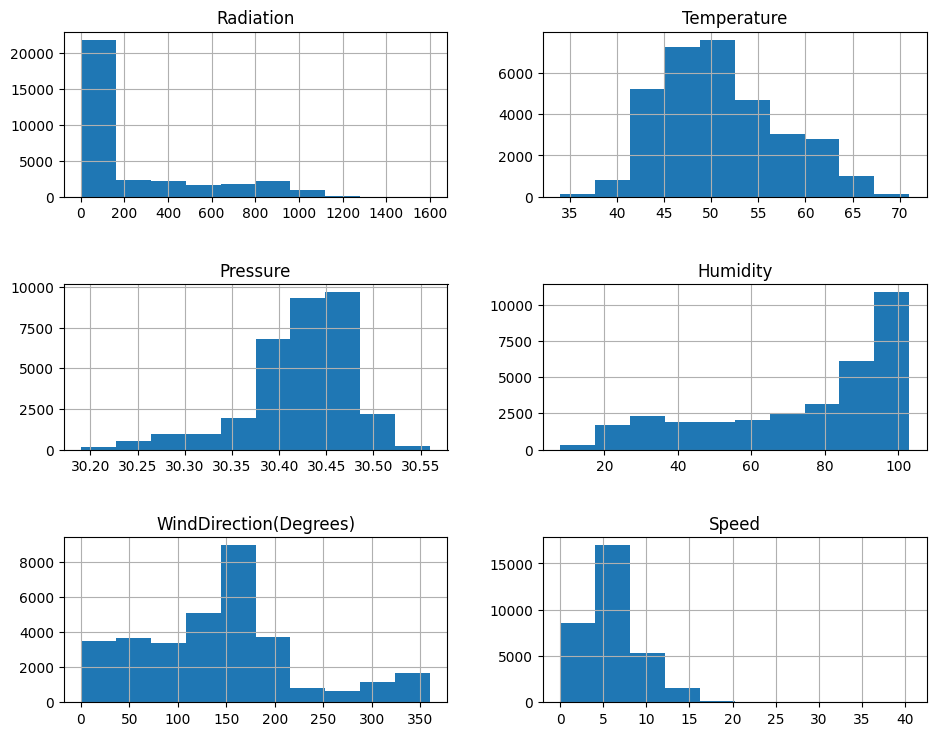

In [ ]:
# Histograms for numerical features
histogram_grid = solarRadiation_df.select(numeric_features).toPandas().hist(layout=(3, 2), figsize=(10, 8))
plt.tight_layout(pad=3.0)
plt.show()

Box plots display the distribution of numerical features and highlight any outliers present in the data. It provide a visual summary of the central tendency, spread, and skewness of each feature's distribution.

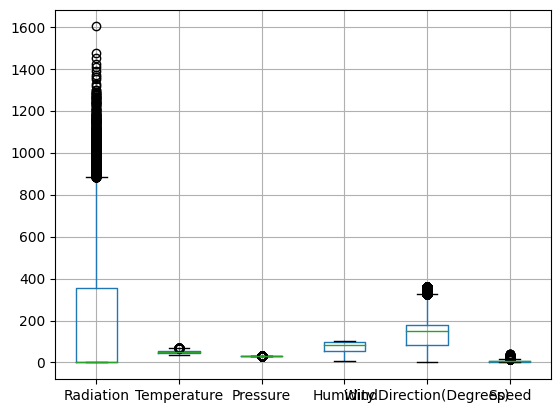

In [ ]:
# Box plots for numerical features
solarRadiation_df.select(numeric_features).toPandas().boxplot()
plt.show()

This line plot shows the variation of radiation levels over time. It helps to identify any temporal trends, seasonality, or patterns in radiation levels, providing insights into how radiation varies over different time periods.

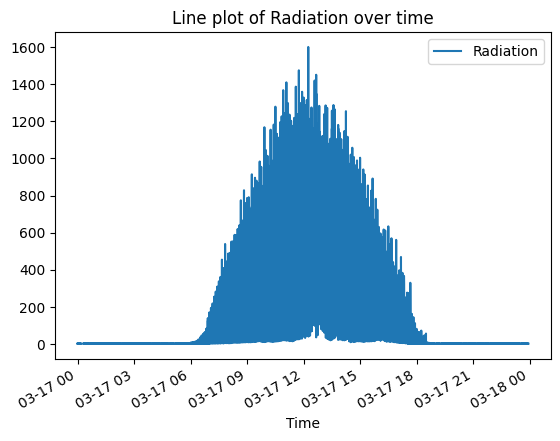

In [ ]:
 # Extract hour, day, month, and year from timestamp columns
solarRadiation_df = solarRadiation_df.withColumn("Hour", hour("Time"))
solarRadiation_df = solarRadiation_df.withColumn("Day", dayofmonth("Time"))
solarRadiation_df = solarRadiation_df.withColumn("Month", month("Time"))
solarRadiation_df = solarRadiation_df.withColumn("Year", year("Time"))

#Line plot of Radiation over time
solarRadiation_df.select("Time", "Radiation").toPandas().set_index("Time").plot()
plt.title('Line plot of Radiation over time')
plt.show()

The scatter plot visualizes the relationship between radiation and temperature. It helps to identify any correlation or association between these two variables. It helps to understand how radiation levels change with variations in temperature.

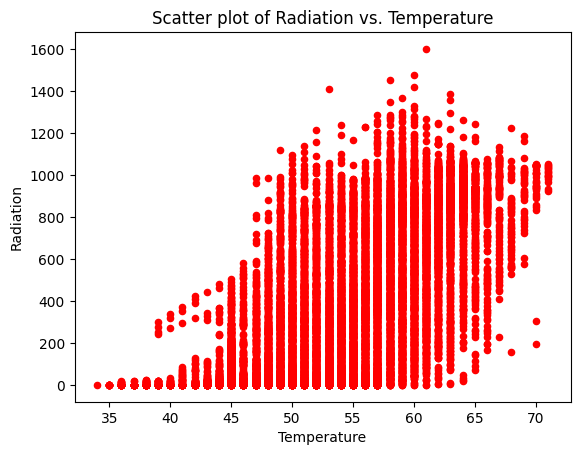

In [ ]:
# Scatter plot of Radiation vs. Temperature
solarRadiation_df.select("Radiation", "Temperature").toPandas().plot.scatter(x="Temperature", y="Radiation", color='red')
plt.title('Scatter plot of Radiation vs. Temperature')
plt.show()

These correlations quantify the relationship between the sunrise/sunset times and radiation levels. It help to assess whether there's any correlation between the time of day and radiation levels, which can be useful for understanding diurnal patterns in radiation.

In [ ]:
from pyspark.sql.functions import unix_timestamp

# Convert timestamp columns to numeric representation
solarRadiation_df = solarRadiation_df.withColumn("TimeSunRiseNumeric", unix_timestamp("TimeSunRise"))
solarRadiation_df = solarRadiation_df.withColumn("TimeSunSetNumeric", unix_timestamp("TimeSunSet"))

# Compute correlation matrix
correlation_matrix = solarRadiation_df.select(["TimeSunRiseNumeric", "TimeSunSetNumeric", "Radiation"]).toPandas().corr()

# Print correlation values
print("Correlation between TimeSunRiseNumeric and Radiation:", correlation_matrix.loc["TimeSunRiseNumeric", "Radiation"])
print("Correlation between TimeSunSetNumeric and Radiation:", correlation_matrix.loc["TimeSunSetNumeric", "Radiation"])


Correlation between TimeSunRiseNumeric and Radiation: -0.09284997704678945
Correlation between TimeSunSetNumeric and Radiation: 0.04568844653618361


The correlation matrix quantifies the relationship between pairs of numerical features using correlation coefficients. It helps to identify variables that are strongly correlated, which can guide feature selection or further analysis. The heatmap visualization enhances the interpretation of correlations by color-coding the correlation coefficients.

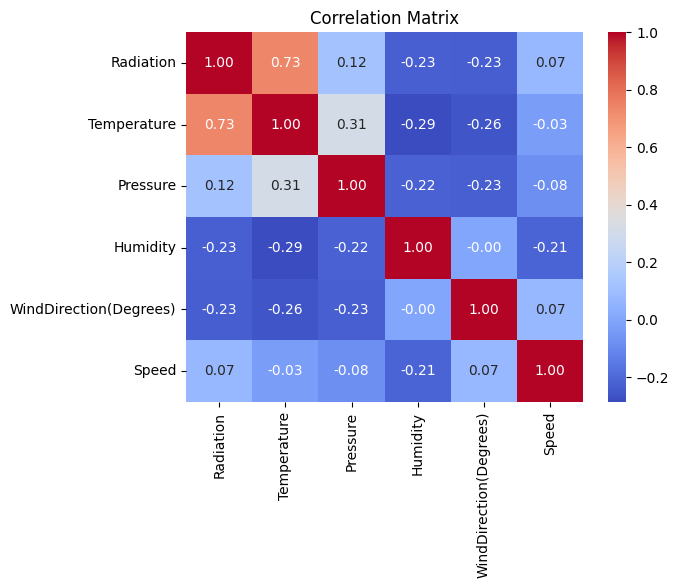

In [ ]:
import seaborn as sns

# Correlation matrix
correlation_matrix = solarRadiation_df.select(numeric_features).toPandas().corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet)
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets
- Create vectors for relavent features
- One-hot encode catagorical variables

## D. Transformation
This step is also one of a critical step  align with the typical preprocessing steps done based on EDA insight,selected features in to vector format,normalazing numerical features to have a similar scales and aggregating the data at monthly level that helps to complete dataset ready for further analysis or model training.

## 1. Transformation:
This transformations at the individual data point level. It includes steps such as feature selection, assembling features into a vector, scaling or normalizing numerical features, and extracting additional time-related features. These transformations are applied to each row of the dataset.

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
from pyspark.sql.functions import hour, minute, col

# Feature Selection based on EDA Insights
selected_features = ["Temperature", "Pressure", "Speed"]

# Assemble selected features
assembler = VectorAssembler(inputCols=selected_features, outputCol="features")
assembled_df = assembler.transform(solarRadiation_df)

# Scale or normalize numerical features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaled_df = scaler.fit(assembled_df).transform(assembled_df)

# Extract hour and minute from timestamp
scaled_df = scaled_df.withColumn("Hour", hour("Time"))
scaled_df = scaled_df.withColumn("Minute", minute("Time"))

# Filter data for the time range identified in EDA
filtered_df = scaled_df.filter((scaled_df["Hour"] >= 6) & (scaled_df["Hour"] <= 19))

# Show the resulting DataFrame
filtered_df.show()


+----------+-------------------+-------------------+---------+-----------+--------+--------+----------------------+-----+-------------------+-------------------+----+---+-----+----+------------------+-----------------+-----------------+--------------------+------+
|  UNIXTime|               Data|               Time|Radiation|Temperature|Pressure|Humidity|WindDirection(Degrees)|Speed|        TimeSunRise|         TimeSunSet|Hour|Day|Month|Year|TimeSunRiseNumeric|TimeSunSetNumeric|         features|     scaled_features|Minute|
+----------+-------------------+-------------------+---------+-----------+--------+--------+----------------------+-----+-------------------+-------------------+----+---+-----+----+------------------+-----------------+-----------------+--------------------+------+
|1475214923|2016-09-29 00:00:00|2024-03-17 19:55:23|     1.22|       50.0|   30.46|      47|                157.78| 6.75|2024-03-17 06:13:00|2024-03-17 18:13:00|  19| 17|    3|2024|        1710655980|     

By aggregating data at monthly level wil help to explore more if seasonal or monthly level of variable difference is seen or not.

In [ ]:
from pyspark.sql.functions import year, month

# Aggregate data at the monthly level
monthly_data = solarRadiation_df.withColumn("Year", year("Data")).withColumn("Month", month("Data")) \
    .groupBy("Year", "Month") \
    .agg({"Temperature": "mean", "Pressure": "mean", "Humidity": "mean", "Radiation": "mean", "Speed": "mean"}) \
    .orderBy("Year", "Month")

# Show the aggregated monthly data
monthly_data.show()


+----+-----+------------------+-----------------+-----------------+------------------+------------------+
|Year|Month|    avg(Radiation)|       avg(Speed)|    avg(Humidity)|  avg(Temperature)|     avg(Pressure)|
+----+-----+------------------+-----------------+-----------------+------------------+------------------+
|2016|    9| 229.8048280976117|5.457366859916506|79.48577592018336| 53.68113792638533|  30.4320978832418|
|2016|   10|230.58229225710835|5.880242602879926|78.94637796168234| 52.46865434757964|30.438462759324807|
|2016|   11|226.72774987927693|6.852886286818503|62.38495895702559| 50.78500724287784| 30.44577981651425|
|2016|   12|141.28323983341167|6.733328025478196| 79.5264576188143|47.608892699657034|30.374427976481897|
+----+-----+------------------+-----------------+-----------------+------------------+------------------+



# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


#E. Model Selection, spliting,Model training and Model evaluation
In this steps my focu on choosing appropriate machine learning models for prediction. Since it's a regression problem based on solar radiation prediction, I can consider models like Linear Regression, Decision Trees, Random Forest, Gradient Boosting, etc.

#1. Defining the Model

In [ ]:
from pyspark.ml.regression import LinearRegression, DecisionTreeRegressor, RandomForestRegressor, GBTRegressor

# Define regression models
lr = LinearRegression(featuresCol='scaled_features', labelCol='Radiation')
dt = DecisionTreeRegressor(featuresCol='scaled_features', labelCol='Radiation')
rf = RandomForestRegressor(featuresCol='scaled_features', labelCol='Radiation')
gbt = GBTRegressor(featuresCol='scaled_features', labelCol='Radiation')

# List of models
models = [lr, dt, rf, gbt]


#2. Split the Data into Training and Testing Sets

- Before fitting choosed models, we need to split our dataset into training and testing sets. This allows us to train our models on one subset of the data and evaluate their performance on another subset to ensure they generalize well to unseen data.
- So i choose 80% for training and 20% for testing.
- Reserve a portion of the data for evaluation purposes to avoid overfitting.

In [ ]:
# Split the data into training and testing sets
train_data, test_data = scaled_df.randomSplit([0.8, 0.2], seed=10)
print("Train set count:", train_data.count())
print("Test set count:", test_data.count())

Train set count: 26078
Test set count: 6608


#3. Train and Evaluate Models
 Define a function to train and evaluate machine learning models using Spark MLlib.
- Iterate over different models, train each model on the training data, make predictions on the testing data, and evaluate model performance using appropriate metrics such as RMSE (Root Mean Squared Error).
- Print the evaluation results for each model, including the model name and corresponding RMSE.
- Evaluating  each models and decide which RMSE values are the least and better fit and accurate model.

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator

# Function to train and evaluate models
def train_and_evaluate_model(model):
    # Train the model
    model = model.fit(train_data)

    # Make predictions
    predictions = model.transform(test_data)

    # Evaluate the model
    evaluator = RegressionEvaluator(labelCol="Radiation", predictionCol="prediction", metricName="rmse")
    rmse = evaluator.evaluate(predictions)

    # Print evaluation results
    print("Model:", model.__class__.__name__)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("\n")

# Train and evaluate each model
for model in models:
    train_and_evaluate_model(model)


Model: LinearRegressionModel
Root Mean Squared Error (RMSE): 210.1899301846738


Model: DecisionTreeRegressionModel
Root Mean Squared Error (RMSE): 194.30593681350484


Model: RandomForestRegressionModel
Root Mean Squared Error (RMSE): 197.5401260454232


Model: GBTRegressionModel
Root Mean Squared Error (RMSE): 191.16756070719958




In [ ]:
print("Based on the evaluation results, the model with the lowest RMSE as the best model for predicting solar radiation.\n After evaluating the models, we can say the best-performing one based on the RMSE metric.\n GBTRegressionModel with RMSE 191.167 can  be used for predicting solar radiation with confidence.")

Based on the evaluation results, the model with the lowest RMSE as the best model for predicting solar radiation.
 After evaluating the models, we can say the best-performing one based on the RMSE metric.
 GBTRegressionModel with RMSE 191.167 can  be used for predicting solar radiation with confidence.


#Tuning and cross- validation
Tuning and cross-validation are crucial steps to further improve the performance of the chosen model. These steps help fine-tune the model hyperparameters and ensure its robustness and generalization capability.

In [ ]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Function to perform tuning and cross-validation
def tune_and_cross_validate(model, param_grid, train_data):
    # Define evaluator
    evaluator = RegressionEvaluator(labelCol="Radiation", predictionCol="prediction", metricName="rmse")

    # Define cross-validator
    crossval = CrossValidator(estimator=model,
                              estimatorParamMaps=param_grid,
                              evaluator=evaluator,
                              numFolds=3)

    # Run cross-validation
    cv_model = crossval.fit(train_data)

    # Get the best model from cross-validation
    best_model = cv_model.bestModel

    return best_model

# Define parameter grid for tuning Gradient Boosted Trees
param_grid = (ParamGridBuilder()
              .addGrid(gbt.maxDepth, [5, 10, 15])
              .addGrid(gbt.maxIter, [10, 20, 30])
              .build())

# Perform tuning and cross-validation for Gradient Boosted Trees
best_gbt_model = tune_and_cross_validate(gbt, param_grid, train_data)


Model Evaluation:
Evaluate the performance of the tuned model on the test dataset to ensure that it generalizes well to unseen data. This evaluation is similar to what you did previously for the untuned models.

In [ ]:
# Evaluate the best model on the test data
evaluator = RegressionEvaluator(labelCol="Radiation", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(best_gbt_model.transform(test_data))

# Print evaluation results
print("Root Mean Squared Error (RMSE) on Test Data:", rmse)


Root Mean Squared Error (RMSE) on Test Data: 190.3746132193375
